<a href="https://colab.research.google.com/github/felipenaito/data_science/blob/master/Projeto_2_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando a Violência no Rio de Janeiro**

![alt text](https://diariodorio.com/wp-content/uploads/2016/06/Violencia-Rio-de-Janeiro1-1280x720.jpg)

O Rio de Janeiro é muito conhecido pelo seu turismo, pelas belas paisagens e pelo povo acolhedor. 

Contudo, junto com toda a atenção e fluxo de pessoas que lá existe, vemos muito nos jornais e nos noticiários também sobre a violência no estado. 

É um assunto fortemente interconectado com a discussão da atuação policial para o assunto, como pode-se ver [aqui](https://g1.globo.com/rj/rio-de-janeiro/noticia/2019/09/29/violencia-policial-nao-diminui-ocorrencia-de-crimes-no-rj-aponta-estudo-do-ministerio-publico.ghtml) e também muitas discussões sobre suas causas e como pode e deve ser abordado, inclusive em [pautas de vestibulares](https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.html).

Dado esse contexto, o que encontraríamos com uma análise de dados?

E esse é exatamente o tópico abordado neste projeto. Faremos a análise da violência no Rio de Janeiro com base nos dados fornecidos pelo próprio Governo do Estado do Rio de Janeiro, que podem ser encontrados [neste site](http://www.ispdados.rj.gov.br/estatistica.html).



## Obtenção dos Dados

Com isso, iniciaremos a nossa análise importando os arquivos da fonte que citamos. 

* Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
* Um *dashboard* interativo e visual pode ser encontrado no site abaixo, para quem deseja olhar mais a fundo:
    * http://www.ispvisualizacao.rj.gov.br/index.html


O nosso arquivo será importado através do `pandas` ao dataframe `df`

### Importando os dados


In [0]:
# importando o arquivo e armazenando em 'df'

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Aqui faremos breve descrição inicial dos dados. Essa é a parte inicial da exploração dos dados que obtemos. Antes de abordarmos questões relevantes, como informações estatísticas, vamos entender:

* Qual o tamanho DataFrame
* Os nomes das colunas 
* Quais os tipos das variáveis 
* Visualizaremos as 5 primeiras linhas 
* Qual a porcentagem de valores ausentes das colunas


### Tamanho do DataFrame

Para verificarmos o tamanho do nosso dataset, utilizaremos o `df.shape`

In [9]:
# Tamanho de nosso dataset

print("Quantidade de observações em nosso dataset: {}".format(df.shape[0]))
print("Quantidade de variáveis em nosso dataset: {}".format(df.shape[1]))

Quantidade de observações em nosso dataset: 344
Quantidade de variáveis em nosso dataset: 56


### Como são as Colunas em nosso DataFrame?

Com o comando `df.info` conseguiremos informações resumidas sobre quais as colunas disponíveis em nosso DataFrame, qual a contagem de valores não nulos e qual o tipo de valor. 

Pode-se notar que:

* Não temos nenhum campo string, são todas do tipo inteiro (int64) ou float (float64)

* Na contagem de não nulos, já temos uma noção de que existem campos com valores nulos, já que o total de linhas é 344. Ou seja, qualquer um que contenha 'non-null count' abaixo de 344, possui valores vazios. 

In [11]:
# utilizamos o df.columns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

### Como são as 5 primeiras linhas?

Agora, olharemos as 5 primeiras linhas com `df.head()` para vermos, de fato, com que valores cada coluna está sendo preenchida.

Com isso, podemos notar que:

* Nossa base é um levantamento, mês a mês, desde 1991.
* As quantidades em cada linha são referentes às ocorrência por variável


In [12]:
# df.head() para ver 5 primeiras linhas

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Qual a porcentagem de linhas vazias por coluna?

Com o nosso `df.head` pudemos perceber de forma explícita o que já haviamos averiguado: temos valores vazios em nosso dataframe.
Para entender o quão relevante é a quantidade de valores vazios, verificaremos quantos são em comparação ao total de linhas.

Para isso, utilizaremos o .isnull() e sua soma .sum() e o sort_values para ordenarmos.

Conseguimos notar que:

* A porcentagem de linhas vazias em certas colunas chega a ser maior do que a quantidade de preenchidas
* Dados relacionados a bicicletas (`roubo_bicicleta` e `furto_bicicleta` são que mais possuem valores vazios: 80.23%)
* Muitos outros dados possuem uma parcela significativa também, como `posse_drogas` e `trafico_drogas` com 53%.

In [23]:
# Soma a quantidade de linhas nulas e divide pelo total de linhas

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

## Informações Estatísticas da Violência no Rio de Janeiro

Breve contextualização...

Descreva e execute as seguintes etapas:

* Imprima o resumo estatístico do seu DataFrame (`describe`)
* Encontre as médias das seguintes variáveis (colunas):
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
* Calcule qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$
* Encontre os valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`


### Resumo Estatístico do DataFrame

Em seguida, faremos o resumo estatístico utilizando `describe`



In [24]:
# df.describe() para resumo estatístico

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Qual a média de roubos de veículos, furtos de veículos e recuperação de veículos?

Com essas informações, teremos as médias para as variáveis referentes a veículos em nosso dataframe.

In [29]:
# print das médias

print('A média de roubo de veículos é: {}'.format(df.roubo_veiculo.mean()))
print('A média de furtos de veículos é: {}'.format(df.furto_veiculos.mean()))
print('A média de recuperação de veículos é: {}'.format(df.recuperacao_veiculos.mean()))

A média de roubo de veículos é: 2448.6976744186045
A média de furtos de veículos é: 1674.671511627907
A média de recuperação de veículos é: 1772.2383720930231


### Qual porcentam dos veículos roubados ou furtados são recuperados?

Um dado interessante de sabermos é quantos dos veículos que foram roubados ou furtados, foram recuperados. 

Para isso, utilizamos a fórmula:
   $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

Como pudemos ver:

* Um total de **42.98%** dos veículos que foram roubados ou furtados foram recuperados considerando todos os dados de nossa base.

In [33]:
# recuperação dividio por roubo + furtos

print(df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum()))

0.42980346705075084


## Visualização de Dados

Agora iremos visualizar os nossos dados para entender um pouco mais da distribuição da variável `hom_doloso` e como que a variável `roubo_em_coletivo` variou com o passar do tempo.

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


### Histograma de Homicídio Doloso

O gráfico de histograma nos traz informações de distribuição. Ou seja, nos ajuda a entender em que faixas de valores da variável que estamos observando se concentra mais.

* Na nossa visualização, estamos olhando a variável de Homícidio Doloso e podemos notar uma frequencia maior de valores abaixo de 600. Contudo, um pico é observado entre 500 e 600, o que nos informa que é um valor que apareceu com mais frequencia. 

* Embora menos frequente, valores maiores como 800 homicídios dolosos no mês foram verificados também. 


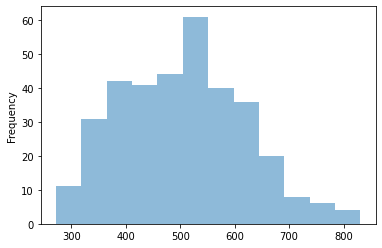

In [37]:
#histograma de hom_doloso

df.hom_doloso.plot.hist(bins = 12, alpha = 0.5)

### Gráfico de linha para a variável Roubo em Coletivo

Aqui fizemos um gráfico de linha para entender como o Roubo em Coletivo evoluiu com o passar do tempo. Para melhor legibilidade e compreensão, alteramos o eixo para uma concatenação entre ano e mês. Assim, ficando mais claro a evolução dos anos.

* Ficou clara a evolução dos valores, principalmente um pico após 2016.

In [56]:
# Alterando o índice para melhor visualização da tendência no tempo

df['ano_mes'] = df.vano.astype(str) + '_' + df.mes.astype(str)

df_index = df.set_index('ano_mes')

print(df_index.head())

         vano  mes  ...  registro_ocorrencias  fase
ano_mes             ...                            
1991_1   1991    1  ...                   NaN     3
1991_2   1991    2  ...                   NaN     3
1991_3   1991    3  ...                   NaN     3
1991_4   1991    4  ...                   NaN     3
1991_5   1991    5  ...                   NaN     3

[5 rows x 56 columns]


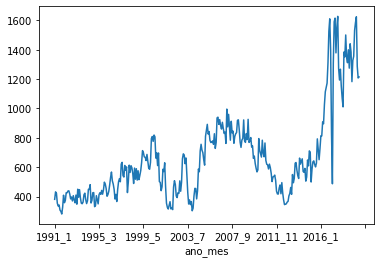

In [57]:
# gráfico de linha para a variável roubo_em_coletivo

df_index.roubo_em_coletivo.plot.line()

## Conclusão

Com isso encerramos nossa análise dos dados de Violência no Rio de Janeiro. 

Sabemos que a violência no Brasil, como um todo, é uma questão difícil e problemática. O Rio de Janeiro acaba tendo uma visibilidade grande nos noticiários devido a sua relevância para o país.

Com isso, utilizamos essa análise como uma oportunidade de entender um pouco mais das perspectivas e dos dados que podemos analisar.

Começamos a nossa análise identificando melhor a estrutura de nossos dados, para em seguida abordar questões de uma perspectiva mais estatística. 

Através de dados fornecidos pelo próprio Estado do Rio de Janeiro, pudemos entender questões como **Recuperação de Veículos Roubados e Furtados** e a evolução de **Roubos em Coletivo**.